<a href="https://colab.research.google.com/github/GauthamPrabhuM/Machine-Learning/blob/main/wordclouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emoji

     |████████████████████████████████| 174 kB 29.3 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=e8e3a5fd5459b767131cadd8b6b9f5556742ce59bab743d2c958d7b5cd5abdf4
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [17]:
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
% matplotlib inline

In [18]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [19]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [20]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [31]:
from google.colab import files
uploaded = files.upload()
parseData = [] 
conversation = 'WhatsApp Chat with group.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parseData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

Saving WhatsApp Chat with group.txt to WhatsApp Chat with group.txt


In [32]:
df = pd.DataFrame(parseData, columns=['Date', 'Time', 'Author', 'Message'])
df["Date"] = pd.to_datetime(df["Date"])
df.tail(20)

,Date,Time,Author,Message
11374,2022-02-17,6:23 pm,Sreeja Pavuluri,bro thoda chill karle it was a joke😭
11375,2022-02-17,6:28 pm,Mr Goswami Ldq,But kaafi valid XD
11376,2022-02-17,7:08 pm,somz,huh really?
11377,2022-02-17,7:08 pm,somz,i thought the major issue was that neha droppe...
11378,2022-02-17,7:08 pm,somz,and she was in charge of the tshirt
11379,2022-02-19,10:21 pm,somz,hello bitches
11380,2022-02-19,10:21 pm,None,somz: come for meeting >:(
11381,2022-02-19,10:21 pm,somz,rn !!!
11382,2022-02-19,10:21 pm,Goth,hello
11383,2022-02-19,10:23 pm,somz,i see y'all leaving me on seen 😖


In [33]:
df.Author.unique()

array([None, 'Shreeyanka', 'Mv Srujan Mit', 'Goth', 'somz',
       'Sushant Shekhar', 'Mr Goswami Ldq', 'An Ldq', 'Sreeja Pavuluri',
       'Sudarsana Mit', 'Shreeyanka:', 'Sudarsana Mit:'], dtype=object)

In [34]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
print(media_messages)
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print(emojis)
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Data science Community")
# print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

675
0
Data science Community
Media: 675
Emojis: 0
Links: 38


In [35]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df.info()
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["somz"]
for i in range(len(l)):
  req_df= messages_df[messages_df["Author"] == l[i]]
  print(f'Stats of {l[i]} -')
  print('Messages Sent', req_df.shape[0])
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10719 entries, 0 to 11393
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      10719 non-null  datetime64[ns]
 1   Time      10719 non-null  object        
 2   Author    10495 non-null  object        
 3   Message   10719 non-null  object        
 4   emoji     10719 non-null  object        
 5   urlcount  10719 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 586.2+ KB
Stats of somz -
Messages Sent 1620
Words per message 5.951234567901235
Media Messages Sent 105
Emojis Sent 0
Links Sent 1



In [36]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)

There are 308014 words in all the messages.


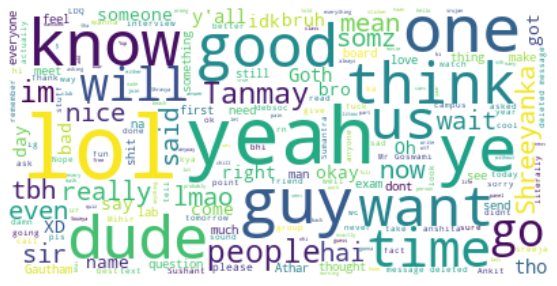

In [37]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Author name somz


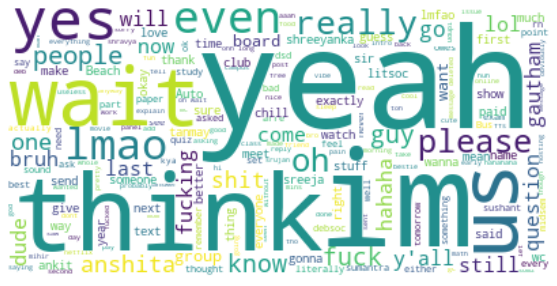

In [38]:
l = ["somz"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Author name An Ldq


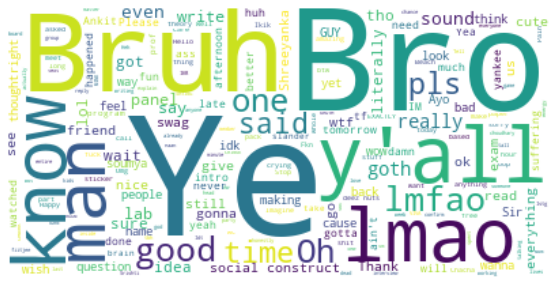

In [39]:
l = ["An Ldq"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Author name Shreeyanka


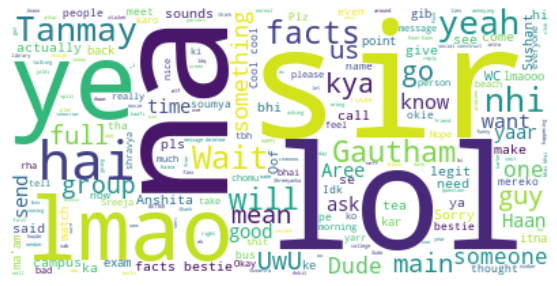

In [40]:
l = ["Shreeyanka"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Author name Mv Srujan Mit


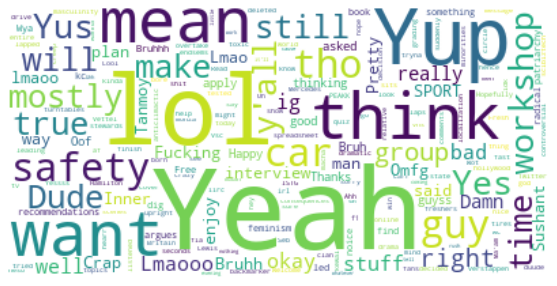

In [44]:
l = ["Mv Srujan Mit"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Author name Mr Goswami Ldq


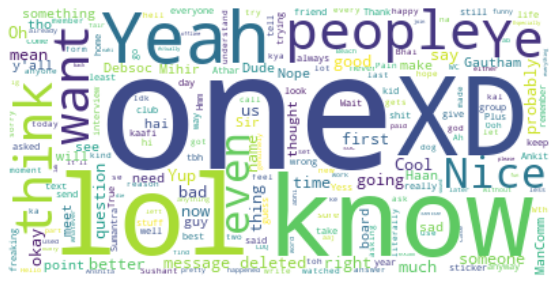

In [46]:
l = ["Mr Goswami Ldq"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Author name Sreeja Pavuluri


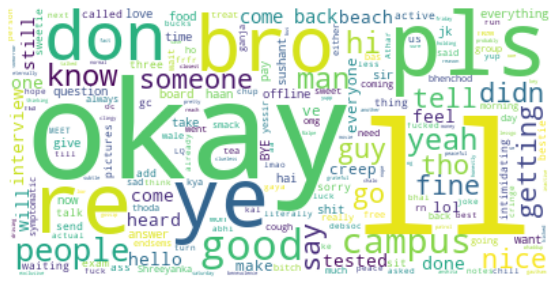

In [47]:
l = ["Sreeja Pavuluri"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Author name Sushant Shekhar


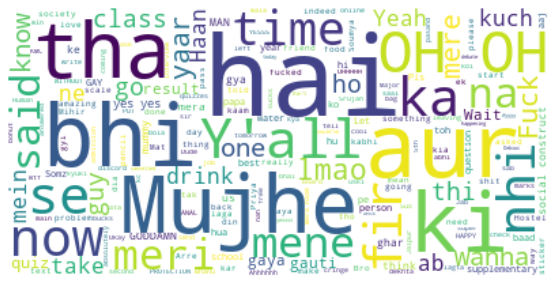

In [48]:
l = ["Sushant Shekhar"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Author name Sudarsana Mit


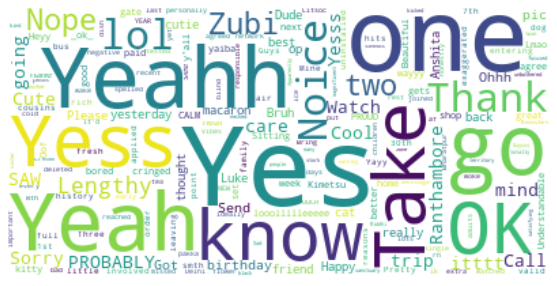

In [49]:
l = ["Sudarsana Mit"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

Author name Goth


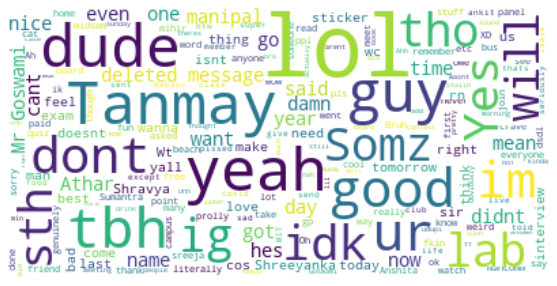

In [50]:
l = ["Goth"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in dummy_df.Message)
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()